<a id='intro'></a>
## Introduction


Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: I think the following questions will be answered by the bike sharing data:<br />
How much is the cost per user for three different cities?<br />
What is the number of users of bike-share in each city?<br />
What is the most common day and time of useage for regular usres and casual users?<br />
What is the most common trip duration?

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

In [1]:
import csv # read and write csv files
import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        
        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
  
        first_trip = next(trip_reader)
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip
  







City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

We will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city.

**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    """
    
    if city=='Chicago' or city=='NYC':
        duration = int(datum['tripduration'])/60
    else:
        duration = int(datum['Duration (ms)'])/60000
    
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [4]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    """
    
    if city=='NYC':
        start_time = datum['starttime']
        formatted_start_time = datetime.datetime.strptime(start_time, "%m/%d/%Y %H:%M:%S")
    elif city=='Washington':
        start_time = datum['Start date']
        formatted_start_time = datetime.datetime.strptime(start_time, "%m/%d/%Y %H:%M")
    else:
        start_time = datum['starttime']
        formatted_start_time = datetime.datetime.strptime(start_time, "%m/%d/%Y %H:%M")
    
    month = formatted_start_time.month
    day_of_week = formatted_start_time.strftime("%A")
    hour = formatted_start_time.hour
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip. 
    """
    
    if city=='NYC' or city=='Chicago':
        user_type = datum['usertype']
    else:
        if datum['Member Type']=='Registered':
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [6]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            new_point['duration'] = duration_in_mins(row, city)
            new_point['month'],new_point['hour'],new_point['day_of_week'] = time_of_trip(row,city)
            new_point['user_type'] = type_of_user(row,city)
            

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            
            trip_writer.writerow(new_point)

In [7]:
# To check my work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: NYC has highest number o trips. NYC has the highest proportion of trips made by subscribers. Washington has the highest proportion of trips made by short-term customers.

In [8]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

In [9]:
"""
        Print out total subscribers , customers , total users , proportion of subscribers and
        proportion of customers in each city.
"""
trips_made = []
data_file = ['./data/Chicago-2016-Summary.csv','./data/NYC-2016-Summary.csv','./data/Washington-2016-Summary.csv']
for file in data_file:
    
    ##store the number of subscribers in n_subscribers , number of customers in n_customers
    ##and number of total customers in n_total
    n_subscribers, n_customers, n_total = number_of_trips(file)
    
    ##print the city name
    print(file.split('-')[0].split('/')[-1])
    
    ##print number of subscribers , customers and total users per city
    print('n_Subscribers = {}\nn_Customers = {}\nn_total = {}'.format(n_subscribers,n_customers,n_total))
    
    ##print the proportion of subscribers
    print("proportion subscribers: {}".format(n_subscribers/n_total))
    
    ##print the proportion of customers
    print("proportion customers: {}\n".format(n_customers/n_total))

Chicago
n_Subscribers = 54982
n_Customers = 17149
n_total = 72131
proportion subscribers: 0.7622520136973008
proportion customers: 0.23774798630269925

NYC
n_Subscribers = 245896
n_Customers = 30902
n_total = 276798
proportion subscribers: 0.8883590199351151
proportion customers: 0.11164098006488486

Washington
n_Subscribers = 51753
n_Customers = 14573
n_total = 66326
proportion subscribers: 0.7802822422579381
proportion customers: 0.21971775774206193



**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: <br>Average trip length for NYC is 16.739946848168653 and proportion of rides than are longer than 30 minutes in NYC is 7.350665800844978%.<br>
Average trip length for Chicago is 16.563629368787335 and proportion of rides than are longer than 30 minutes in Chicago is 8.332062497400562%.<br>Average trip length for Washington is 18.93287355913721 and proportion of rides than are longer than 30 minutes in Washington is 10.83888671109369%.

In [10]:
"""
    This function returns total trips , total duration of trips and trips longer than 30 minutes in each city
"""

def trip_length(data_file):
    total_trips = 0
    total_duration = 0
    trips_longer_than_thirty_mins = 0
    with open(data_file) as f_in:
        reader = csv.DictReader(f_in)                    
        for row in reader:
            ##increment total trips for each row
            total_trips +=1
            
            ##increment duration by duration of row for each row
            total_duration += float(row['duration'])
            
            ##increment the trips_longer_than_thirty_mins variable for each row 
            ##if the trip duration is greater than 30 minutes
            if float(row['duration'])>30:
                trips_longer_than_thirty_mins +=1
                
    return(total_trips,total_duration,trips_longer_than_thirty_mins)



In [11]:
data_file = ['./data/Chicago-2016-Summary.csv','./data/NYC-2016-Summary.csv','./data/Washington-2016-Summary.csv']
for file in data_file:
    
    ##declare the variables total_trips and trips_longer_than_thirty_mins
    ##store the value of total trips and trips which are longer than 30 mins in these variables
    total_trips,total_duration,trips_longer_than_thirty_mins = trip_length(file)
    
    ##print city name
    print(file.split('-')[0].split('/')[-1]+':')
    
    ##print the average duration of trips by dividing total duration by total trips
    print('Average duration = {}'.format(total_duration/total_trips))
    
    ##print the proportion of trips that are longer than 30 mins by dividing trips longer than 30 mins by
    ##total trips and multiplying by 100
    print('Proportion of trips longer than 30 minutes = {}%'.format(trips_longer_than_thirty_mins/total_trips*100))

Chicago:
Average duration = 16.563629368787335
Proportion of trips longer than 30 minutes = 8.332062497400562%
NYC:
Average duration = 15.81259299802294
Proportion of trips longer than 30 minutes = 7.3024371563378345%
Washington:
Average duration = 18.93287355913721
Proportion of trips longer than 30 minutes = 10.83888671109369%


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: On average customers take longer than subscribers.

In [12]:
"""
    This function returns total duration of trips of subscribers and customers.
"""
def trip_length_for_type(file):
    ##declare variables to record total duration of trips of customers and subscribers
    trip_length_subscriber = 0
    trip_length_customer = 0
    
    with open(file) as f_in:
        reader = csv.DictReader(f_in)
        
        for row in reader:
            
            ##we will check if the user is a subscriber or a customer and will then update the lists accordingly
            ##we will also change the type of duration to float because each entity of a csv file is a string
            if row['user_type']=='Subscriber':
                trip_length_subscriber +=float(row['duration'])
            else:
                trip_length_customer +=float(row['duration'])
                
    return(trip_length_subscriber,trip_length_customer)

In [13]:
trip_length_subscriber,trip_length_customer = trip_length_for_type('./data/Washington-2016-Summary.csv')
n_subscribers, n_customers, n_total = number_of_trips('./data/Washington-2016-Summary.csv')
print('Average trip duration of Subscriber is {} and of Customer is {}'.format((trip_length_subscriber/n_subscribers)
                                                                               ,(trip_length_customer/n_customers)))

Average trip duration of Subscriber is 12.528120499294745 and of Customer is 41.67803139252976


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

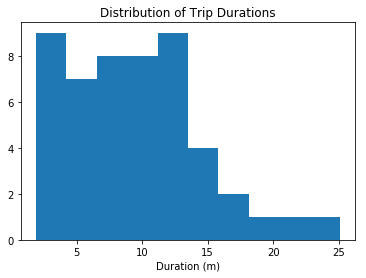

In [14]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

In [15]:
"""
    This function returns a list of durations of users of bike share system in Washington
"""
def create_duration_list(file):
    
    ##declare a list that will record durations
    duration_list= []
    
    with open(file) as f_in:
        reader = csv.DictReader(f_in)
        for row in reader:
            
            ##we will change the type of duration to float because each entity of a csv file is a string
            duration_list.append(float(row['duration']))
            
    return duration_list


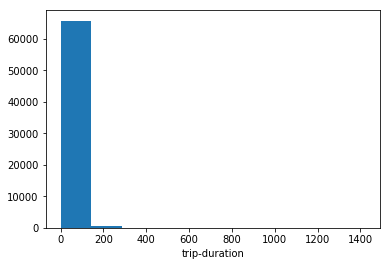

In [16]:
"""
    Histogram of duration of users in Washington
"""
%matplotlib inline 
duration_list = create_duration_list('./data/Washington-2016-Summary.csv')
plt.hist(duration_list)
plt.xlabel('trip-duration')
plt.show()

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: The peak of the distributions are at bins (15,20) and (5,10) for customers and subscribers respectively. 

I would say that the distribution is a log-normal distribution, which is characterized by a quick rise in frequency followed by a steady drop off in values causing a skew in the distribution.

From the histogram we can see that customers tend to use the bikeshare service for longer durations than subscribers do, who mostly seem to use it for short jouneys.

In [17]:
"""
    This fucntion returns a list of subscribers and a list of customers
"""
def get_subs_and_cust(file):
    
    ##declare two lists to keep record of subscribers and customers
    subscriber_list= []
    customer_list= []
    
    with open(file) as f_in:
        reader = csv.DictReader(f_in)
        for row in reader:
            
            ##we will check if the user is a subscriber or a customer and will then update the lists accordingly
            ##we will also change the type of duration to float because each entity of a csv file is a string
            if row['user_type']=='Subscriber':
                subscriber_list.append(float(row['duration']))
            else:
                customer_list.append(float(row['duration']))
                
    return(subscriber_list,customer_list)

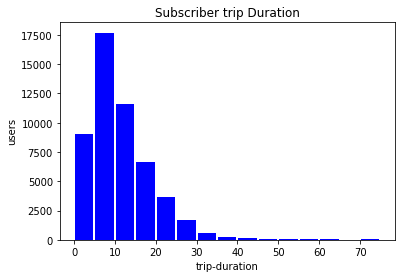

In [18]:
"""
    Histogram of subscriber trip duration of Washington
"""
subscriber_list,customer_list = get_subs_and_cust('./data/Washington-2016-Summary.csv')
%matplotlib inline
plt.hist(subscriber_list,bins = [x for x in range(0,80,5)],range =(0,75),rwidth = 0.9, color = 'b')
plt.title('Subscriber trip Duration')
plt.xlabel('trip-duration')
plt.ylabel('users')
plt.show()

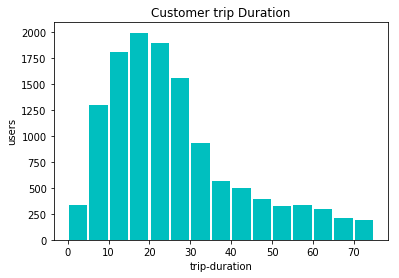

In [19]:
"""
    Histogram of customer trip duration of Washington
"""
%matplotlib inline 
plt.hist(customer_list,bins = [x for x in range(0,80,5)],range =(0,75),rwidth = 0.9,color = 'c')
plt.title('Customer trip Duration')
plt.xlabel('trip-duration')
plt.ylabel('users')
plt.show()

<a id='eda_continued'></a>
## Performing My Own Analysis

**My Questions**: 

What is the busiest hour for bike share system in each city?<br/>What is the most busy day of week for bike share system in each city?<br/>What is the busiest bike share station in each city?<br/>How do the customers and subscribers vary throughout the year? Answer this by drawing a distribution of subscribers and customers for each city.<br/>What is the most busiest month in each city?

**Answer**: 

The busiest hour is hour 17 i.e. 5pm in all the cities.<br/>
Most busiest day is Monday in Chicago and Wednesday in NYC and Washington.<br/>
Most busy station in Chicago is Streeter Dr & Grand Ave and in NYC is Pershing Square North and in Washington is Columbus Circle / Union Station.<br/>As we can see from the histograms below , the customers are very less than subscribers in every month.<br/>In Chicago the most busiest month is July and in NYC August and in Washington July.

In [20]:
"""
    This function returns the most busy hour for the given city
"""
def find_busy_hour(file):
    
    ##declare a dictionary that will record what is the count of hours 
    ##in which user has used bike share system
    hour_count_dict = {}
    
    ##declare variables that will count most busy hour and total customers that used bike in that hour
    busy_hour = 0
    total_cus = 0
    
    with open(file) as f_in:
        reader = csv.DictReader(f_in)
        for row in reader:
            
            ##get the hour from each entry and store it in variable k
            k = row['hour']
            if k in hour_count_dict:
                hour_count_dict[k] += 1
            else:
                hour_count_dict[k] = 1

    ##to get the most busy hour from the above dictionary and return it
    ##each dictionary item is a tuple and contains a key and a value
    ##we will compare the values one by one and keeping updatng the busy_hour variable
    ##with largest dictionary value
    for x in hour_count_dict.items():
        if x[1] > total_cus:
            busy_hour = x[0]
            total_cus = x[1]
            
    return busy_hour

In [21]:
"""
    Find busy hour of bike share system for Chicago , NYC and Washington
"""
busy_hour = find_busy_hour('./data/Chicago-2016-Summary.csv')
print("Most busy hour in Chicago for bike share system is hour {}".format(busy_hour))
busy_hour = find_busy_hour('./data/NYC-2016-Summary.csv')
print("Most busy hour in NYC for bike share system is hour {}".format(busy_hour))
busy_hour = find_busy_hour('./data/Washington-2016-Summary.csv')
print("Most busy hour in Washington for bike share system is hour {}".format(busy_hour))

Most busy hour in Chicago for bike share system is hour 17
Most busy hour in NYC for bike share system is hour 17
Most busy hour in Washington for bike share system is hour 17


In [22]:
"""
    This function returns the most busy day of the week for the given city
"""
def find_busiest_day(file):
    
    ##declare a dictionary that will record what is the count of days 
    ##in which user has used bike share system
    day_count_dict = {}
    
    ##declare variables that will count most busy hour and total customers that used bike in that hour
    busy_day = 0
    total_cus = 0
    
    with open(file) as f_in:
        reader = csv.DictReader(f_in)
        for row in reader:
            
            ##get the day of week from the user row of file and store in variable k
            k = row['day_of_week']
            if k in day_count_dict:
                day_count_dict[k] += 1
            else:
                day_count_dict[k] = 1

    ##to get the most busy day from the above dictionary and return it
    ##each dictionary item is a tuple and contains a key and a value
    ##we will compare the values one by one and keeping updatng the busy_hour variable
    ##with largest dictionary value
    for x in day_count_dict.items():
        if x[1] > total_cus:
            busy_day = x[0]
            total_cus = x[1]
            
    return busy_day

In [23]:
"""
    Find busy hour of bike share system for Chicago , NYC and Washington
"""
busy_hour = find_busiest_day('./data/Chicago-2016-Summary.csv')
print("Most busy day in Chicago for bike share system is {}".format(busy_hour))
busy_hour = find_busiest_day('./data/NYC-2016-Summary.csv')
print("Most busy day in NYC for bike share system is {}".format(busy_hour))
busy_hour = find_busiest_day('./data/Washington-2016-Summary.csv')
print("Most busy day in Washington for bike share system is {}".format(busy_hour))

Most busy day in Chicago for bike share system is Monday
Most busy day in NYC for bike share system is Wednesday
Most busy day in Washington for bike share system is Wednesday


In [24]:
"""
    This function returns the most busy bike share station for the given city
"""
def most_busy_station(file):
    
    ##get the city name from filename
    city = file.split('-')[0].split('/')[-1]
    
    ##declare a dictionary that will record what is the count of days 
    ##in which user has used bike share system
    station_count_dict = {}
    
    ##declare variables to record the most busiest station and total customers that used that station
    busy_station = ''
    total_cus = 0
    
    with open(file) as f_in:
        reader = csv.DictReader(f_in)
        
        ##in this function we will use the old datasets
        ##we will get the start station name and end station name 
        ##for the user in the given city and store in variables k and t
        for row in reader:
            if city == 'NYC':
                k = row['start station name']
                t = row ['end station name']
            elif city == 'Chicago':
                k = row['from_station_name']
                t = row['to_station_name']
            else:
                k = row['Start station']
                t = row['End station']
            
            ##adding station names to dictionary and incrementing the count 
            ##if it already exists in dictionary
            if k in station_count_dict:
                station_count_dict[k] += 1
            else:
                station_count_dict[k] = 1

            if t in station_count_dict:
                station_count_dict[t] += 1
            else:
                station_count_dict[t] = 1
                
    ##to get the most busy station from the above dictionary and return it
    ##each dictionary item is a tuple and contains a key and a value
    ##we will compare the values one by one and keeping updatng the busy_hour variable
    ##with largest dictionary value

    for x in station_count_dict.items():
        list(x)
        if x[1] > total_cus:
            busy_station = x[0]
            total_cus = x[1]
            
    return busy_station

In [25]:
"""
    Find busy station of bike share system for Chicago , NYC and Washington
"""
busy_station = most_busy_station('./data/Chicago-Divvy-2016.csv')
print("Most busy station in Chicago for bike share system is  {}".format(busy_station))
busy_station = most_busy_station('./data/NYC-CitiBike-2016.csv')
print("Most busy station in NYC for bike share system is  {}".format(busy_station))
busy_station = most_busy_station('./data/Washington-CapitalBikeshare-2016.csv')
print("Most busy station in Washington for bike share system is  {}".format(busy_station))

Most busy station in Chicago for bike share system is  Streeter Dr & Grand Ave
Most busy station in NYC for bike share system is  Pershing Square North
Most busy station in Washington for bike share system is  Columbus Circle / Union Station


In [26]:
"""
    This function returns two lists. First list contains months 
    in which each subscriber used the bike share system and second 
    one return months in which each customer used the bike share system.
"""
def list_of_months(file):
    
    ##declare two lists to keep record of months in which each subscriber and customer used the bike
    subscriber_month_list = []
    customer_month_list = []
    with open(file) as f_in:
        reader = csv.DictReader(f_in)
        for row in reader:
            
            ##declare a variable to store month of the user
            k = row['month']
            
            ##we will check if the user is a subscriber or a customer and update the month lists accordingly
            if row['user_type'] == 'Subscriber':
                subscriber_month_list.append(int(k))
            else:
                customer_month_list.append(int(k))
                
    return customer_month_list,subscriber_month_list

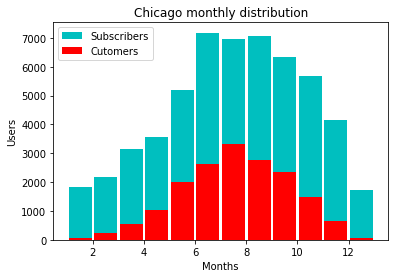

In [27]:
"""
    Histogram of monthly subscribers and customers of Chicago using above created function 'list_of_months'
"""
customer_month_list,subscriber_month_list = list_of_months('./data/Chicago-2016-Summary.csv')
%matplotlib inline 
plt.hist(subscriber_month_list,bins = [x for x in range(1,14,1)],rwidth = 0.9,color = 'c',label='Subscribers')
plt.hist(customer_month_list,bins = [x for x in range(1,14,1)],rwidth = 0.9,color = 'r',label='Cutomers')
plt.xlabel('Months')
plt.ylabel('Users')
plt.title('Chicago monthly distribution')
plt.legend()
plt.show()

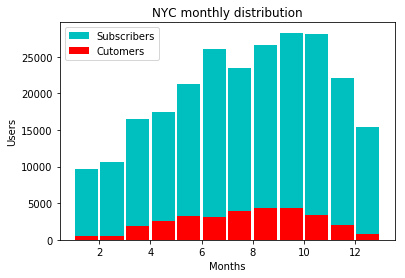

In [28]:
"""
    Histogram of monthly subscribers and customers of NYC
"""
customer_list,subscriber_list = list_of_months('./data/NYC-2016-Summary.csv')
%matplotlib inline 
plt.hist(subscriber_list,bins = [x for x in range(1,14,1)],rwidth = 0.9,color = 'c',label='Subscribers')
plt.hist(customer_list,bins = [x for x in range(1,14,1)],rwidth = 0.9,color = 'r',label='Cutomers')
plt.xlabel('Months')
plt.ylabel('Users')
plt.title('NYC monthly distribution')
plt.legend()
plt.show()

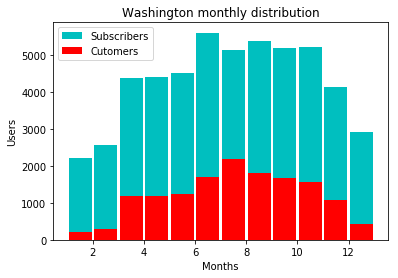

In [29]:
"""
    Histogram monthly subscribers and customers of Washington 
"""
customer_list,subscriber_list = list_of_months('./data/Washington-2016-Summary.csv')
%matplotlib inline 
plt.hist(subscriber_list,bins = [x for x in range(1,14,1)],rwidth = 0.9,color = 'c',label='Subscribers')
plt.hist(customer_list,bins = [x for x in range(1,14,1)],rwidth = 0.9,color = 'r',label='Cutomers')
plt.xlabel('Months')
plt.ylabel('Users')
plt.title('Washington monthly distribution')
plt.legend()
plt.show()

In [30]:
"""
    This function will return the most busiest month of the year for subscribers and customers
"""
def most_busy_month(file):
    
    ##declare two variables to record the busy month of the year and other one to keep track of users in that month
    busy_month = 0
    users = 0
    
    ##We will use list_of_months function to get the list of months of subscribers and cutsomers for a given city
    customer_month_list,subscriber_month_list = list_of_months(file)
    
    ##we will run the for loop 12 times one for each month
    for x in range(1,13):
        
        ##count frequency of each month i.e number of users in that month
        count_of_users_in_month = customer_month_list.count(x)
        
        ##we will keep checking for each month if that is most frequent or not
        if users < count_of_users_in_month:
            users  = count_of_users_in_month
            busy_month = x
            
    return busy_month

In [31]:
"""
    Print the most busiest month in each city
"""
busy_month = most_busy_month('./data/Chicago-2016-Summary.csv')
print("Most busy month of the year in Chicago for bike share system is {}th month.".format(busy_month))
busy_month = most_busy_month('./data/NYC-2016-Summary.csv')
print("Most busy month of the year in NYC for bike share system is {}th month.".format(busy_month))
busy_month = most_busy_month('./data/Washington-2016-Summary.csv')
print("Most busy month of the year in Washington for bike share system is {}th month.".format(busy_month))

Most busy month of the year in Chicago for bike share system is 7th month.
Most busy month of the year in NYC for bike share system is 8th month.
Most busy month of the year in Washington for bike share system is 7th month.


<a id='conclusions'></a>
## Conclusions
**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**:I would love to apply my data science skills in restaurant analysis of major cities.
From this project I would like to be able to learn following things:<br/>
Which is most busiest restaurant in each city and overall?<br/>
What is the most served cusine?<br/>
What is the most and least busiest time to visit a restaurant?<br/>
What is the average number of customers daily?<br/>
What is the most served food in each city?<br/>
What is the average food cost for a restaurant<br/>
Which city has most restaurants?<br/>
Which city has highest percentage of highest rated restaurants?<br/>
What is the average opening and closing time of restaurants in each city?<br/>